In [5]:
!pip install simple_image_download

INFO: pip is looking at multiple versions of simple-image-download to determine which version is compatible with other requirements. This could take a while.


In [6]:
from simple_image_download import simple_image_download as sid
import os
import cv2
import numpy  as np
import tensorflow as tf

In [7]:
class_names = ['hamburger', 'hotdog', 'sandwich', 'tortilla', 'taco', 'pizza', 'chichen', 'pasta']

In [8]:
response= sid.simple_image_download

for class_name in class_names:
    response().download(class_name, 20)

In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications.vgg16 import preprocess_input

In [10]:
base_model = VGG16(include_top = False,
                   weights = 'imagenet',
                   input_shape = (224, 224, 3))
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
base_dir = '/content/simple_images'
X_data = []
y_data = []
for i, class_name in enumerate(class_names):
  folder_dir = os.path.join(base_dir,class_name)

  for file_name in os.listdir(folder_dir):
    img_file = os.path.join(folder_dir, file_name)
    img = cv2.imread(img_file)
    if img is None:
      pass
    else:
      img_resized = cv2.resize(img, (224, 224))
      img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
      img_scaled = preprocess_input(img_rgb)
      X_data.append(img_scaled)
      y_data.append(i)

X_data =np.array(X_data)
y_data =np.array(y_data)
print(X_data.shape)
print(y_data.shape)

(113, 224, 224, 3)
(113,)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model2 = load_model('/content/Food_Discerning.h5')
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet152 (Functional)               │ (None, 7, 7, 2048)          │      58,370,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,095,242 (320.80 MB)

 Trainable params: 25,724,296 (98.13 MB)

 Non-trainable params: 58,370,944 (222.67 MB)

 Optimizer params: 2 (12.00 B)

In [12]:
model2.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model2.fit(X_data, y_data, epochs = 20)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 71s 12s/step - accuracy: 0.7286 - loss: 4.3953
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 83s 13s/step - accuracy: 0.8779 - loss: 0.8854
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 83s 13s/step - accuracy: 0.8850 - loss: 0.7043
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 79s 12s/step - accuracy: 0.9352 - loss: 0.2310
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 51s 12s/step - accuracy: 0.9090 - loss: 0.5366
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 82s 12s/step - accuracy: 0.9363 - loss: 0.2904
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 50s 12s/step - accuracy: 0.9263 - loss: 0.2936
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 82s 12s/step - accuracy: 0.9263 - loss: 0.3112
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 81s 12s/step - accuracy: 0.9283 - loss: 0.2730
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 83s 12s/step - accuracy: 0.9196 - loss: 0.2258
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 84s 13s/step - accuracy: 0.9377 - loss: 0.1812
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 51s 12s/step - accuracy: 0.9398 - loss: 0.1850
E

In [13]:
def img_preprocessing(img):
  img = cv2.imread(img_file)
  img_resized = cv2.resize(img, (224, 224))
  img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
  img_scaled = preprocess_input(img_rgb)
  img_batch = np.expand_dims(img_scaled, axis = 0)
  print(img_batch.shape)
  return img_batch

img = cv2.imread('/content/다운로드.jpg')
img_batch = img_preprocessing(img)

(1, 224, 224, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Text(0.5, 1.0, 'pasta')

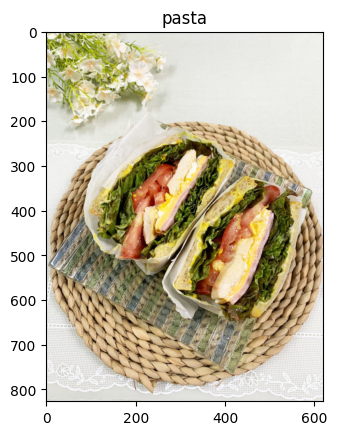

In [19]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
prediction = model2.predict(img_batch)
img = plt.imread('/content/다운로드.jpg')
plt.imshow(img)
plt.title(class_names[np.argmax(prediction)])